In [6]:
import pandas as pd
import os


Task #1 Merge the 12 months of sales data into a single csv file


In [7]:

df=pd.read_csv("/Sales_Data/Sales_April_2019.csv")
files= [file for file in os.listdir('/Sales_Data')]
all_months_data=pd.DataFrame()

for file in files:
  df=pd.read_csv("/Sales_Data/"+file)
  all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)
 


In [8]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


### Clean up the data

In [9]:
all_data.tail(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186750,222816,Flatscreen TV,1,300,06/27/19 21:52,"65 8th St, San Francisco, CA 94016"
186751,222817,iPhone,1,700,06/21/19 10:27,"114 7th St, Los Angeles, CA 90001"
186752,222817,Wired Headphones,1,11.99,06/21/19 10:27,"114 7th St, Los Angeles, CA 90001"
186753,222818,Wired Headphones,1,11.99,06/22/19 02:35,"757 Willow St, New York City, NY 10001"
186754,222819,Lightning Charging Cable,1,14.95,06/07/19 10:42,"926 4th St, Dallas, TX 75001"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [10]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data=all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [11]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


### Convert Column to the correct type

In [12]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  #Make float

###Augument Data with additional columns

### Add months columns

In [13]:
all_data["Months"]=all_data['Order Date'].str[0:2]
all_data["Months"]=all_data['Months'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


### Add a sales column 


In [14]:
all_data['Sales']= all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


### Task 4: Add a city column

In [15]:
# Lets use apply method
all_data['column']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1] ) #for each of data in column will seperate with comma , we want to get the second index
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,column
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston


In [16]:
#or we can use
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]
all_data['city']=all_data['Purchase Address'].apply(lambda x: get_city(x)+ " " + get_state(x))
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,column,city
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City,New York City NY
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,Austin TX
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,Los Angeles CA
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,Seattle WA
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston,Boston MA


What was the best month to selll?


In [17]:
results=all_data.groupby('Months').sum()
results

,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


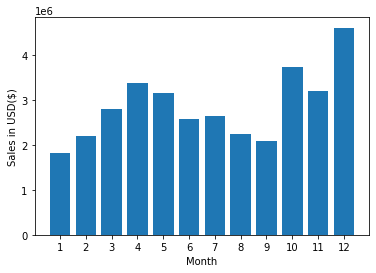

In [18]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months) #name every bar with every month
plt.ylabel('Sales in USD($)')
plt.xlabel('Month')
plt.show()


In [19]:
### what city hat the highest number of sale

In [20]:
results=all_data.groupby('city').sum()
results

,Quantity Ordered,Price Each,Months,Sales
city,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


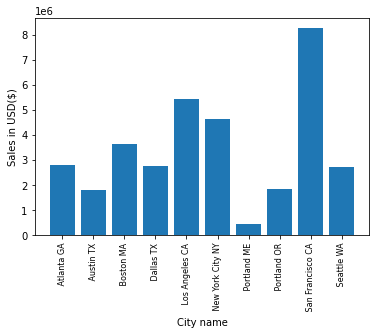

In [21]:
import matplotlib.pyplot as plt
cities=[city for city, df in all_data.groupby('city')]
plt.bar(cities,results["Sales"])
plt.xticks(cities,rotation='vertical',size=8) #name every bar with every month
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
plt.show()


##What time should we display advertisements to maximise likelihood of customer's buying product

In [30]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,column,city,Order Data
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City,New York City NY,2019-11-21 09:54:00
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,Austin TX,2019-11-17 10:03:00
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,Los Angeles CA,2019-11-19 14:56:00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,Seattle WA,2019-11-25 22:24:00
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston,Boston MA,2019-11-09 13:56:00


In [32]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,column,city,Order Data,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City,New York City NY,2019-11-21 09:54:00,9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,Austin TX,2019-11-17 10:03:00,10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,Los Angeles CA,2019-11-19 14:56:00,14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,Seattle WA,2019-11-25 22:24:00,22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston,Boston MA,2019-11-09 13:56:00,13,56


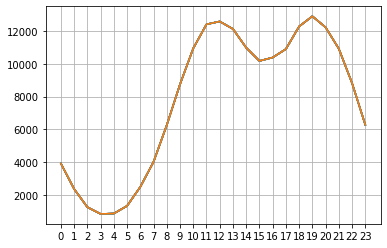

In [37]:
hours=[hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()
#at aroung 11am and 19pm

according to the graph we should make advertisement at 12 or 7pm 

Question 4: What products are most often sold together?


In [44]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
9,278806,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,"Wired Headphones,Apple Airpods Headphones"
24,278819,"iPhone,Apple Airpods Headphones"
39,278833,"iPhone,Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones,27in FHD Monitor"
65,278857,"USB-C Charging Cable,AAA Batteries (4-pack)"
151,278940,"Apple Airpods Headphones,AAA Batteries (4-pack)"
156,278944,"Google Phone,Bose SoundSport Headphones"
159,278946,"iPhone,Lightning Charging Cable,Wired Headphones"
185,278970,"Google Phone,USB-C Charging Cable"


In [47]:
from itertools import combinations
from collections import Counter
count=Counter()

for row in df['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
  print(key,value )

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Question5: What product sold the most? Why do you think it sold the most?**

In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,column,city,Order Data,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City,New York City NY,2019-11-21 09:54:00,9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,Austin TX,2019-11-17 10:03:00,10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,Los Angeles CA,2019-11-19 14:56:00,14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,Seattle WA,2019-11-25 22:24:00,22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston,Boston MA,2019-11-09 13:56:00,13,56


In [69]:
product_group=all_data.groupby('Product')
product_group.sum()


,Quantity Ordered,Price Each,Months,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


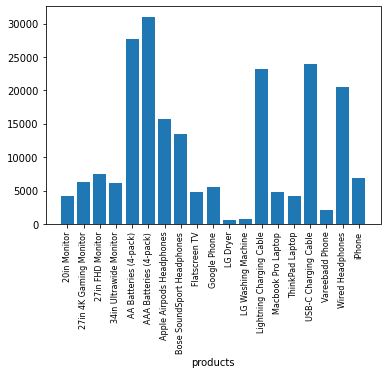

In [65]:
quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xlabel('products')
plt.ylabel=('quantity ordered')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

In [62]:
prices=all_data.groupby('Product').mean() ['Price Each']
print(prices)

                            Quantity Ordered  Price Each  ...       Hour     Minute
Product                                                   ...                      
20in Monitor                        1.006828      109.99  ...  14.329188  29.810290
27in 4K Gaming Monitor              1.002247      389.99  ...  14.593258  29.587640
27in FHD Monitor                    1.005728      149.99  ...  14.325296  29.299054
34in Ultrawide Monitor              1.002912      379.99  ...  14.411260  29.684517
AA Batteries (4-pack)               1.343004        3.84  ...  14.498809  29.598046
AAA Batteries (4-pack)              1.502689        2.99  ...  14.404922  29.655201
Apple Airpods Headphones            1.007203      150.00  ...  14.361309  29.298990
Bose SoundSport Headphones          1.009906       99.99  ...  14.442402  29.463640
Flatscreen TV                       1.003958      300.00  ...  14.336458  29.747708
Google Phone                        1.001267      600.00  ...  14.385339  29

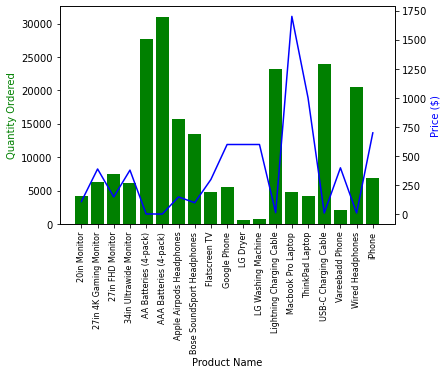

In [71]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()